# Semi-supervised GAN (SGAN)

1) Link to the Youtube tutorial video, Part 1: https://www.youtube.com/watch?v=AP0A8PgYfro&list=PLZsOBAyNTZwboR4_xj-n3K6XBTweC4YVD&index=14
2) Link to the Youtube tutorial video, Part 2: https://www.youtube.com/watch?v=mjftYIKSlLQ&list=PLZsOBAyNTZwboR4_xj-n3K6XBTweC4YVD&index=15

3) **Instructions:**
    1) This is a main script that builds a SGAN model to perform MNIST classification tasks. The performance of the SGAN model will be compared with the ones of CNN in the supplementary script, to show semi-supervised learning method eliminates the need of a huge labelled data to get a trained model with high performance.

4) **Explanation of SGAN:**
    1) The purpose of semi-supervised GAN (SGAN) is to get a trained discriminator (it is the trained discriminator) that can perform classification tasks well similar to CNN, even with a small labelled dataset.
    2) Supervised part:
        1) When the discriminator is trained with ground truths of dataset class labels, the discriminator is trained to learn the image features of different classes in the dataset.
    3) Unsupervised part:
        1) When the discriminator is trained with ground truths of if the given image is real/fake, the discriminator is trained to learn the image features of the dataset, such that it can take an image and tell if that image looks similar to the ones in that dataset (based on the features of that image). If that image looks similar to that dataset, the discriminator will provide probability score >= 0.5 (indicating it is a real image). Else, the discriminator will provide probability score < 0.5 (indicating it is a fake image)
        2) The generator is trained to generate each image that consists of features similar to the ones in that dataset, so that the generator can fool the discriminator to classify the generated image is a real image (an image looks similar to the ones in that dataset used to train the discriminator)
    

5) **Explanation of why the normal GAN model is an unsupervised learning model:**
    1) <img src="hidden\photo1.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
        1) Reference: https://stackoverflow.com/questions/44445778/are-gans-unsupervised-or-supervised
    2) For supervised learning model (EG: ANN), we provide data with labels/classes (EG: the class of in MNIST dataset, such as class 0 represents image of number 0) for the ANN to learn to predict a label associated with the data (such that after training with MNIST dataset, the ANN can predict an unseen image 0 to have label of 0, which means the ANN predicts correctly). In other words, the goal of supervised learning is for the model to generalize to new data. Hence, we need to assign labels to the training data (the data comes with labels/classes/categories: supervised).
    3) For normal GAN model, we label data with real/fake image ground truths (1/0) [supervised component] for GAN model to learn what the data looks like (EG: in terms of features, density estimation,...) [unsupervised component] so that GAN model can generate new samples of what it has learned [unsupervised component]. However, the data does not comes with class labels that corresponding to its dataset (EG: we do not provide a label 0 to distinguish that data belongs to image of number 0) [unsupervised component]. In other words, we use supervised component to train the GAN model to reach its goal which is the unsupervised component. We define a model as supervised/unsupervised based on the component of its goal. So for the case of GAN model, it is an unsupervised learning model. The most important take away is no labeling (class label of the dataset) is needed or provided to the GAN algorithm.


6) **Motivation of having semi-supervised learning:**
    1) <img src="hidden\photo2.png" alt="This image is a representation of the simple neural network" style="width: 600px;"/>  <br />
    2) It is very hard to annotate(label) a very huge data (EG:MNIST) by you alone
    3) Even after you have labelled a very huge data, you don't know if the data you labelled can be used effectively to get good performance (EG: classification results). If can't, you have to relabel the huge data again and this takes lots of time.

7) **Concept of semi-supervised GAN (SGAN):**
    1) <img src="hidden\photo3.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
        1) However, if I have lots of data, I would directly use CNN. Because SGAN training is slower compared to regular CNN training, since you're training three models inside the SGAN (supervised discriminator, unsupervised discriminator and generator).
    2) <img src="hidden\photo4.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
    3) <img src="hidden\photo5.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
        1) Remember that in regular GAN, the discriminator (represented as the discriminator block here) is a binary classifier to classify its input image as real or fake 
    4) <img src="hidden\photo6.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
        1) But in SGAN, the first part of the discriminator (represented as the discriminator block here) is only a feature extractor. We can extend the functionality of this discriminator by adding a classifier as its second part to make it either a binary classifier discriminator (also called unsupervised discriminator) or multi-class classifier discriminator (also called supervised discriminator). This means both unsupervised and supervised discriminators takes the same extracted features as the input but using their own different classifiers to provide different outputs.
        2) The unsupervised discriminator is just a multiclass classifier that classify(predict) the dataset class label of the input data(image).
        3) The supervised discriminator is just a binary classifier that classify(predict) if the input data(image) is a real data(image) [something like if the input data(image) looks similar to the ones in that dataset used for training]. 
    5) <img src="hidden\photo7.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
    6) Generator structure:
        1) <img src="hidden\photo8.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
    7) Supervised discriminator structure:
        1) <img src="hidden\photo9.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
    8) Unsupervised discriminator structure:
        1) <img src="hidden\photo10.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
    9) Composite model structure (generator + unsupervised discriminator):
        1) <img src="hidden\photo11.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
    10) SGAN training process:
        1) <img src="hidden\photo12.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
        2) Eventually, we will only take the trained supervised discriminator to perform classification tasks. According to the SGAN training process, it can be understood in this way:
            1) The weights and parameters of the first part of supervised discriminator [feature extractor] and also the second part of the supervised discriminator [multiclass classifier] are updated (trained) based on the loss function obtained when the supervised discriminator is trained using labelled data
            2) The weights and parameters of the first part of supervised discriminator [feature extractor] are updated (trained) based on the loss function obtained when the unsupervised discriminator is trained using unlabelled real and fake data. This is because both the supervised and unsupervised discriminators share/use/consists the same feature extractor (first part of discriminator).
            3) The generator plays the role of generating fake data to train the weights and paramters of the first of the first part of supervised discriminator [feature extractor]. The weights and parameters of the generator are updated (trained) based on the loss function obtained when the composite model is trained, so that the generator can generate better fake data to train the weights and parameters of the first part of supervised discriminator [feature extractor] better from time to time.



8) **Goal of this tutorial:**
    1) When small labelled data (EG: total 100 labelled MNIST images, 10 images for each class) are used to trained a CNN for classification tasks, the CNN yields test accuracy of 79%. By using the same labelled data, can a semi-supervised GAN (SGAN) can be trained for classification tasks and yield test accuracy higher than the one of CNN?
    2) So in this script:
        1) we train the SGAN and evaluate the performance of its trained supervised discriminator in MNIST classification tasks. 
        2) Then, compare it with the performance of the CNN ones.
    

9) **Methods to train the SGAN:**
    1) After selecting a subset samples of the dataset, for each training batch:
        1) Part 1: Train the supervised discriminator (using 100 data comes with dataset class labels)
        2) Part 2: Train the unsupervised discriminator (using 60000 data without dataset class labels: [at each batch, you randomly pick 50 samples (real data) from the 60000 samples (real data) during unsupervised discriminator learning] + [50 fake data])
        3) Part 3: Train the generator (using 100 latent vectors to generate 100 fake data [without dataset class labels] to train the unsupervised discriminator)
        4) Part 4: Summarize loss on this batch
    2) So in terms of semi-supervised learning perspective, the SGAN in this tutorial uses 100 labelled data for the supervised learning and 100 unlabelled data for the unsupervised learning. This yields the ratio of (labelled data:unlabelled data) = (100:60000).
    
10) **Conclusion of this tutorial:**
    1) You can get a much better model for classification tasks by training it on limited labelled training data, but the requirement is you need to have a lot more unlabelled training data (images) that you can use to train your model for feature extraction. 
    2) For example, here, if you only have 100 labelled images to train your supervised discriminator, your supervised discriminator is not going to get such high classification accuracy. 
    3) Your trained supervised discriminator gets such high accuracy because you use all those 60 000 MNIST images (at each batch, you randomly pick 50 samples (real data) from the 60000 samples (real data) during unsupervised discriminator learning) to train the discriminator for feature extraction [The weights and biases of the 1st part of the supervised discriminator (feature extractor) are updated]. 
    4) And only using your 100 labelled images (for labeling purposes) to train your supervised discriminator for multi-class label classification [The weights and biases of the 1st part of the supervised discriminator (feature extractor) are updated + the weights and biases of the 2nd part of the supervised discriminator (classifier) are upadated].

In [32]:
"""
Semi-supervised GAN (SGAN)

Semi-supervised refers to the training process where the model gets trained only
on a few labeled images but the data set contains a lot more unlabeled images. 
This can be useful in situations where you have a humongous data set but only 
partially labeled. 

In regular GAN the discriminator is trained in an unsupervised manner, where it
predicts whether the image is real or fake (binary classification). 
In SGAN, in addition to unsupervised, the discriminator gets trained in a 
supervised manner on class labels for real images (multiclass classification). 

In essence, the unsupervised mode trains the discriminator to learn features and
the supervised mode trains on corresponding classes (labels). The GAN
can be trained using only a handful of labeled examples. 

In a standard GAN our focus is on training a generator that we want to use to generate
fake images. In SGAN, our goal is to train the discriminator to be an excellent classifier
using only a few labeled images. We can still use the generator to generate fake images but
our focus is on the discriminator. 

Why do we want to follow this path is CNNs can easily classify images?
Apparently, this approach achieves better accuracy for limited labeled data compared to CNNs. 
(https://arxiv.org/abs/1606.01583)

Another useful resource: https://arxiv.org/pdf/1606.03498.pdf​
"""

# example of semi-supervised gan for mnist
from numpy import expand_dims, zeros, ones, asarray
from numpy.random import randn, randint

from keras.datasets.mnist import load_data
from keras.optimizers import adam_v2
from keras.models import Model, Sequential

from keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from keras.layers import LeakyReLU, Dropout, Lambda, Activation

#from keras.utils import to_categorical

from matplotlib import pyplot as plt
from keras import backend as K
import numpy as np

# Supplementary part:

## Define the function to create/build/define the generator network

In [33]:
# define the standalone generator model
def define_generator(latent_dim):
	
	in_lat = Input(shape=(latent_dim,))
	#Start with enough dense nodes to be reshaped and ConvTransposed to 28x28x1
	n_nodes = 256 * 7 * 7
	X = Dense(n_nodes)(in_lat)
	X = LeakyReLU(alpha=0.2)(X)
	X = Reshape((7, 7, 256))(X)
	
	X = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same')(X) #14x14x128
	X = LeakyReLU(alpha=0.2)(X)
	
	X = Conv2DTranspose(64, (3,3), strides=(1,1), padding='same')(X) #14x14x64
	X = LeakyReLU(alpha=0.2)(X)
	# output
	out_layer = Conv2DTranspose(1, (3,3), strides=(2,2), activation='tanh', 
                             padding='same')(X) #28x28x1
	# define model
	model = Model(in_lat, out_layer)
	return model

# gen_model=define_generator(100)
# print(gen_model.summary())

## Define the function to create/build/define the base discriminator network (first part of the discriminator, feature extractor) 

In [34]:
# Define the base discriminator model (first part of the discriminator, feature extractor) for supervised and unsupervised discriminators
# This is the base discriminator that supervised and unsupervised discriminators are going to share weights from.  
def define_discriminator(in_shape=(28,28,1), n_classes=10):
    in_image = Input(shape=in_shape)
    X = Conv2D(32, (3,3), strides=(2,2), padding='same')(in_image)
    X = LeakyReLU(alpha=0.2)(X)
    
    X = Conv2D(64, (3,3), strides=(2,2), padding='same')(X)
    X = LeakyReLU(alpha=0.2)(X)
    
    X = Conv2D(128, (3,3), strides=(2,2), padding='same')(X)
    X = LeakyReLU(alpha=0.2)(X)
    
    X = Flatten()(X)
    X = Dropout(0.4)(X) #Consider adding more dropout layers to minimize overfitting - remember we work with limited labeled data. 
    X = Dense(n_classes)(X)
    
    model = Model(inputs=in_image, outputs=X)
    
    return model


## Define the function to create/build/define the supervised discriminator network 

In [35]:
# Define the supervised discriminator. 
# Multiclass classification, so we will use softmax activation.
# To avoid converting our labels to categorical, we will work with sparse categorical crossentropy loss. 
def define_sup_discriminator(disc):
    model=Sequential()
    model.add(disc) # Use the layers/structure of the base discriminator (1st part of the discriminator)
    model.add(Activation('softmax')) # Classifier layer (binary classifier)
    #Let us use sparse categorical loss so we dont have to convert our Y to categorical
    model.compile(optimizer=adam_v2.Adam(lr=0.0002, beta_1=0.5), 
                  loss="sparse_categorical_crossentropy",metrics=['accuracy'])
    return model


## Define the function to create/build/define the unsupervised discriminator network 

In [36]:
#Define the unsupervised discriminator
#Takes the output of the supervised, just before the softmax activation. 
#Then, adds a layer with calculation of sum of exponential outputs. (defined below as custom_activation)
# Reference: https://arxiv.org/abs/1606.03498

#This custom activation layer gives a value close to 0 for smaller activations
#in the prior discriminator layer. It gives values close to 1 for large activations.
#This way it gives low activation for fake images. No need for sigmoid anymore.  

# custom activation function for the unsupervised discriminator
#D(x) = Z(x) / (Z(x) + 1) where Z(x) = sum(exp(l(x))). l(x) is the output from sup discr. prior to softmax
def custom_activation(x):
    Z_x = K.sum(K.exp(x), axis=-1, keepdims=True)
    D_x = Z_x /(Z_x+1)
    
    return D_x

#You can also try the built in tensorflow function: tf.reduce_logsumexp(class_logits, 1)

def define_unsup_discriminator(disc):
    model=Sequential()
    model.add(disc) # Use the layers/structure of the base discriminator (1st part of the discriminator)
    model.add(Lambda(custom_activation)) # Classifier layer (Multiclass classifier)
    model.compile(loss='binary_crossentropy', optimizer=adam_v2.Adam(lr=0.0002, beta_1=0.5))
    return model


# disc=define_discriminator()
# disc_sup=define_sup_discriminator(disc)
# disc_unsup=define_unsup_discriminator(disc)
# print(disc_unsup.summary())

## Define the function to create/build/define and compile the combined model

In [37]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(gen_model, disc_unsup):
	
	disc_unsup.trainable = False # make unsupervised discriminator not trainable
	gan_output = disc_unsup(gen_model.output) # Generator output (fake data) is the input to the unsupervised discriminator. 
	model = Model(gen_model.input, gan_output)
	model.compile(loss='binary_crossentropy', optimizer=adam_v2.Adam(lr=0.0002, beta_1=0.5))
	return model

# gan_model = define_gan(gen_model, disc_unsup)
# print(gan_model.summary())

## Define the function to load dataset

In [38]:
# load the images
def load_real_samples(n_classes=10):
    (trainX, trainy), (_, _) = load_data()
    X = expand_dims(trainX, axis=-1)
    X = X.astype('float32')
    X = (X - 127.5) / 127.5  # scale from [0,255] to [-1,1] as we will be using tanh activation. 
    print(X.shape, trainy.shape)
    return [X, trainy]

#data = load_real_samples()

## Define the function to randomly select a subset of data for each class

In [39]:
#select subset of the dataset for supervised training
#Let us pick only 100 samples to be used in supervised training. 
#Also, we need to ensure we pick 10 samples per class to ensure a good balance
#of data between classes. 
def select_supervised_samples(dataset, n_samples=100, n_classes=10):
 	X, y = dataset
 	X_list, y_list = list(), list()
 	n_per_class = int(n_samples / n_classes) #Number of amples per class. 
 	for i in range(n_classes):
         X_with_class = X[y == i] # get all images for this class [This line ensure that dataset is balanced]
         ix = randint(0, len(X_with_class), n_per_class) # choose random images for each class
         [X_list.append(X_with_class[j]) for j in ix] # add to list
         [y_list.append(i) for j in ix]
 	return asarray(X_list), asarray(y_list) #Returns a list of 2 numpy arrays corresponding to X and Y


## Define the function to get a subset of dataset which involved in training only

In [40]:
# Pick real samples from the dataset.
#Return both images and corresponding labels in addition to y=1 indicating that the images are real. 
#Remember that we will not use the labels for unsupervised, only used for supervised. 
def generate_real_samples(dataset, n_samples):
    
	images, labels = dataset
	ix = randint(0, images.shape[0], n_samples)
	X, labels = images[ix], labels[ix] #Select random images and corresponding labels
	y = ones((n_samples, 1)) #Label all images as 1 as these are real images. (for the discriminator training) 
	return [X, labels], y

## Define the function to generate latent points

In [41]:
# generate latent points, to be used as inputs to the generator. 
def generate_latent_points(latent_dim, n_samples):
	z_input = randn(latent_dim * n_samples)
	z_input = z_input.reshape(n_samples, latent_dim) # reshape for input to the network
	return z_input

## Define the function to generate fake data using the generator

In [42]:
# Generate fake images using the generator and above latent points as input to it. 
#We do not care about labeles so the generator will not know anything about the labels. 
def generate_fake_samples(generator, latent_dim, n_samples):
	
	z_input = generate_latent_points(latent_dim, n_samples)
	fake_images = generator.predict(z_input)
	# create class labels
	y = zeros((n_samples, 1)) #Label all images as 0 as these are fake images. (for the discriminator training) 
	return fake_images, y

## Define the function to report accuracy and save plots & the model periodically

In [43]:
# report accuracy and save plots & the model periodically. 
def summarize_performance(step, gen_model, disc_sup, latent_dim, dataset, n_samples=100):
	# Generate fake images
	X, _ = generate_fake_samples(gen_model, latent_dim, n_samples)
	
	X = (X + 1) / 2.0 # scale to [0,1] for plotting
	# plot images
	for i in range(100):
		plt.subplot(10, 10, 1 + i)
		plt.axis('off')
		plt.imshow(X[i, :, :, 0], cmap='gray_r')
	# save plot to drive
	filename1 = 'generated_plot_%04d.png' % (step+1)
	plt.savefig(filename1)
	plt.close()
    
	# evaluate the discriminator 
	X, y = dataset
	_, acc = disc_sup.evaluate(X, y, verbose=0)
	print('Discriminator Accuracy: %.3f%%' % (acc * 100))
	# save the generator model
	filename2 = 'gen_model_%04d.h5' % (step+1)
	gen_model.save(filename2)
	# save the Discriminator (classifier) model
	filename3 = 'disc_sup_%04d.h5' % (step+1)
	disc_sup.save(filename3)
	print('>Saved: %s, %s, and %s' % (filename1, filename2, filename3))

## Define the function to train the GAN model

In [44]:
# train the generator and discriminator
def train(gen_model, disc_unsup, disc_sup, gan_model, dataset, latent_dim, n_epochs=20, n_batch=100):
	
    # select supervised dataset for training.
    #Remember that we are not using all 60k images, just a subset (100 images, 10 per class. )
	X_sup, y_sup = select_supervised_samples(dataset)
	#print(X_sup.shape, y_sup.shape)
	
	bat_per_epo = int(dataset[0].shape[0] / n_batch) # MNIST train set consists of 60000 samples. Since we set batch size as 100, there are 60000/100=600 batches(steps) per epoch training
	# iterations
	n_steps = bat_per_epo * n_epochs
	
	half_batch = int(n_batch / 2)
	print('n_epochs=%d, n_batch=%d, 1/2=%d, b/e=%d, steps=%d' % (n_epochs, 
                                                              n_batch, half_batch, 
                                                              bat_per_epo, n_steps))
	
    #  enumerate epochs
	for i in range(n_steps):
		# Part 1: Train the supervised discriminator (using 100 data comes with dataset class labels)
		# update supervised discriminator (disc_sup) on real samples.
        #Remember that we use real labels to train as this is supervised. 
        #This is the discriminator we really care about at the end.
        #Also, this is a multiclass classifier, not binary. Therefore, our y values 
        #will be the real class labels for MNIST. (NOT 1 or 0 indicating real or fake.)
		[Xsup_real, ysup_real], _ = generate_real_samples([X_sup, y_sup], half_batch) # Use data comes with dataset class labels
		sup_loss, sup_acc = disc_sup.train_on_batch(Xsup_real, ysup_real)
        
		# Part 2: Train the unsupervised discriminator (using 60000 data without dataset class labels: [at each batch, you randomly pick 50 samples (real data) from the 60000 samples (real data) during unsupervised discriminator learning] + [50 fake data])
		# update unsupervised discriminator (disc_unsup) - just like in our regular GAN.
        #Remember that we will not train on labels as this is unsupervised, just binary as in our regular GAN.
        #The y_real below indicates 1s telling the discriminator that these images are real. 
        #do not confuse this with class labels. 
        #We will discard this discriminator at the end. 
		[X_real, _], y_real = generate_real_samples(dataset, half_batch) # Use data without dataset class labels
		d_loss_real = disc_unsup.train_on_batch(X_real, y_real)
        #Now train on fake. 
		X_fake, y_fake = generate_fake_samples(gen_model, latent_dim, half_batch)
		d_loss_fake = disc_unsup.train_on_batch(X_fake, y_fake)
        
		# Part 3: Train the generator (using 100 latent vectors to generate 100 fake data [without dataset class labels] to train the unsupervised discriminator)
		# update generator (gen) - like we do in regular GAN.
        #We can discard this model at the end as our primary goal is to train a multiclass classifier (sup. disc.)
		X_gan, y_gan = generate_latent_points(latent_dim, n_batch), ones((n_batch, 1))
		gan_loss = gan_model.train_on_batch(X_gan, y_gan)
        
		# Part 4: Summarize loss on this batch
		print('>%d, c[%.3f,%.0f], d[%.3f,%.3f], g[%.3f]' % (i+1, sup_loss, sup_acc*100, d_loss_real, d_loss_fake, gan_loss))
		# evaluate the model performance periodically
		if (i+1) % (bat_per_epo * 1) == 0:
			summarize_performance(i, gen_model, disc_sup, latent_dim, dataset)

# Main part:

## Create generator, discriminator, and combined models

In [45]:
latent_dim = 100

# create the discriminator models
disc=define_discriminator() #Bare discriminator model... 
disc_sup=define_sup_discriminator(disc) #Supervised discriminator model
disc_unsup=define_unsup_discriminator(disc) #Unsupervised discriminator model. 

gen_model = define_generator(latent_dim) #Generator
gan_model = define_gan(gen_model, disc_unsup) #GAN
dataset = load_real_samples() #Define the dataset by loading real samples. (This will be a list of 2 numpy arrays, X and y)

c:\Users\weiyo\anaconda3\envs\GPUEnv\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(60000, 28, 28, 1) (60000,)


# Train the GAN model

In [46]:
# train the model
# NOTE: 1 epoch = 600 steps in this example. 
# This is because MNIST train set consists of 60000 samples. Since we set batch size as 100, there are 60000/100=600 batches(steps) per epoch training
train(gen_model, disc_unsup, disc_sup, gan_model, dataset, latent_dim, n_epochs=10, n_batch=100)

n_epochs=10, n_batch=100, 1/2=50, b/e=600, steps=6000
>1, c[2.289,20], d[0.094,2.400], g[0.095]
>2, c[2.297,8], d[0.092,2.398], g[0.095]
>3, c[2.303,14], d[0.090,2.397], g[0.095]
>4, c[2.287,20], d[0.088,2.397], g[0.096]
>5, c[2.282,24], d[0.086,2.396], g[0.096]
>6, c[2.274,24], d[0.085,2.395], g[0.096]
>7, c[2.263,22], d[0.082,2.393], g[0.096]
>8, c[2.265,22], d[0.081,2.391], g[0.096]
>9, c[2.238,38], d[0.078,2.389], g[0.097]
>10, c[2.280,14], d[0.076,2.389], g[0.097]
>11, c[2.252,32], d[0.074,2.392], g[0.097]
>12, c[2.242,34], d[0.073,2.392], g[0.097]
>13, c[2.255,26], d[0.072,2.387], g[0.098]
>14, c[2.200,42], d[0.071,2.376], g[0.099]
>15, c[2.233,22], d[0.070,2.356], g[0.101]
>16, c[2.209,26], d[0.069,2.339], g[0.103]
>17, c[2.195,20], d[0.065,2.331], g[0.104]
>18, c[2.223,26], d[0.064,2.332], g[0.104]
>19, c[2.169,42], d[0.063,2.343], g[0.103]
>20, c[2.120,46], d[0.062,2.352], g[0.103]
>21, c[2.148,32], d[0.065,2.356], g[0.104]
>22, c[2.104,50], d[0.067,2.346], g[0.106]
>23, c[2.0

# Evaluations:

## Deploy the trained supervised discriminator (the model we want) for evaluation

Test Accuracy: 92.890%


<AxesSubplot:>

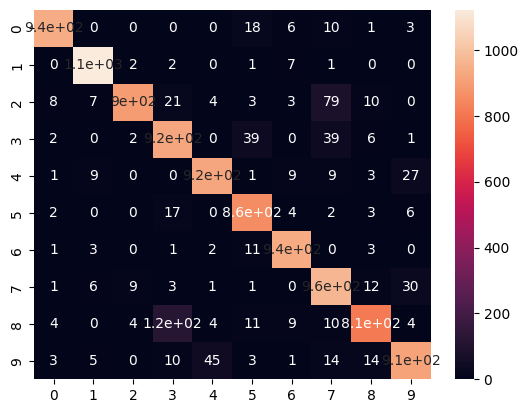

In [48]:
#EVALUATE THE SUPERVISED DISCRIMINATOR ON TEST DATA
# This is the model we want as a classifier. 
##################################################################
from keras.models import load_model
# load the model
disc_sup_trained_model = load_model('disc_sup_6000.h5')

# load the dataset
(_, _), (testX, testy) = load_data()

# expand to 3d, e.g. add channels
testX = expand_dims(testX, axis=-1)

# convert from ints to floats
testX = testX.astype('float32')

# scale from [0,255] to [-1,1]
testX = (testX - 127.5) / 127.5

# evaluate the model
_, test_acc = disc_sup_trained_model.evaluate(testX, testy, verbose=0)
print('Test Accuracy: %.3f%%' % (test_acc * 100))

# Predicting the Test set results
y_pred_test = disc_sup_trained_model.predict(testX)
prediction_test = np.argmax(y_pred_test, axis=1)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(testy, prediction_test)
sns.heatmap(cm, annot=True)






## Deploy the trained generator for evaluation

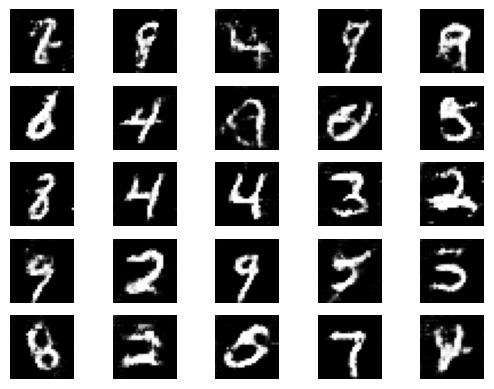

In [49]:
#############################################################################
#PREDICT / GENERATE IMAGES using the generator, just for fun.
##################################################################

# Plot generated images 
def show_plot(examples, n):
	for i in range(n * n):
		plt.subplot(n, n, 1 + i)
		plt.axis('off')
		plt.imshow(examples[i, :, :, :], cmap='gray')
	plt.show()

# load model
gen_trained_model = load_model('gen_model_6000.h5') #Model trained for 100 epochs
# generate images
latent_points = generate_latent_points(100, 25)  #Latent dim and n_samples
# generate images
X = gen_trained_model.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

X = (X*255).astype(np.uint8)

# plot the result
show_plot(X, 5)

